# Stock Forecasting using Exogenous Variables with PyAF

https://github.com/antoinecarme/pyaf

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyaf.ForecastEngine as autof

import yfinance as yf
yf.pdr_override()

In [2]:
stock = 'AMD' # input
start = '2017-01-01' # input 
end = '2021-11-08'  # input
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,11.42,11.65,11.02,11.43,11.43,55182000
2017-01-04,11.45,11.52,11.24,11.43,11.43,40781200
2017-01-05,11.43,11.69,11.23,11.24,11.24,38855200
2017-01-06,11.29,11.49,11.11,11.32,11.32,34453500
2017-01-09,11.37,11.64,11.31,11.49,11.49,37304800


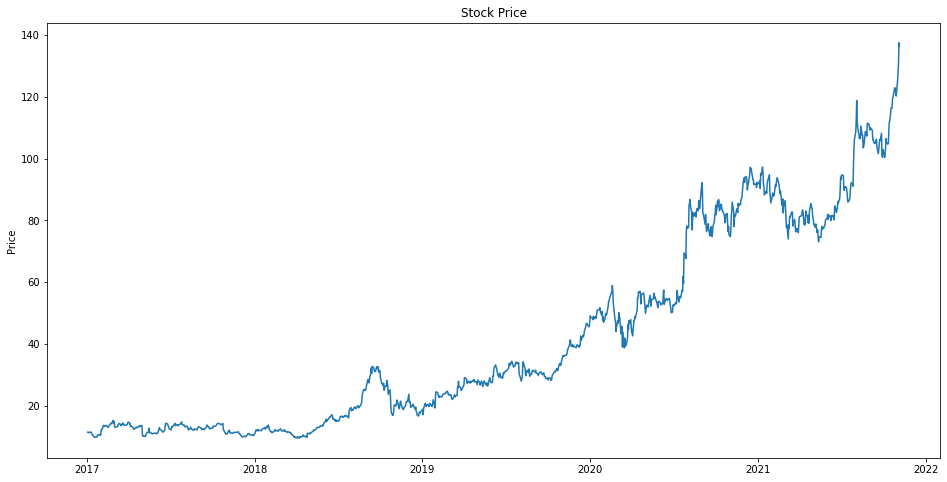

In [4]:
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'])
plt.title('Stock Price')
plt.ylabel('Price')
plt.show()

In [5]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,11.42,11.65,11.02,11.43,11.43,55182000
1,2017-01-04,11.45,11.52,11.24,11.43,11.43,40781200
2,2017-01-05,11.43,11.69,11.23,11.24,11.24,38855200
3,2017-01-06,11.29,11.49,11.11,11.32,11.32,34453500
4,2017-01-09,11.37,11.64,11.31,11.49,11.49,37304800


In [6]:
lEngine = autof.cForecastEngine()

In [7]:
lExogenousData = (df, ['Open' , 'High' , 'Low',  'Volume']) 

lEngine.train(df, 'Date' , 'Close', 12 , lExogenousData);

INFO:pyaf.std:START_TRAINING 'Close'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['Close']' 12.254021167755127


In [8]:
lEngine.getModelInfo()

INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2017-01-03T00:00:00.000000 TimeMax=2020-11-03T00:00:00.000000 TimeDelta=<DateOffset: days=1> Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Close' Length=1221  Min=9.529999732971191 Max=137.5  Mean=42.16723996005422 StdDev=31.905376318970223
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Close' Min=9.529999732971191 Max=137.5  Mean=42.16723996005422 StdDev=31.905376318970223
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Close_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR' [Lag1Trend + Cycle_None + NoAR]
INFO:pyaf.std:TREND_DETAIL '_Close_Lag1Trend' [Lag1Trend]
INFO:pyaf.std:CYCLE_DETAIL '_Close_Lag1Trend_residue_bestCycle_byMAPE' [Cycle_None]
INFO:pyaf.std:AUTOREG_DETAIL '_Close_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR' [NoAR]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.026 MAPE_Forecast=0.0184 MAPE_Test=0.018
INFO:pyaf.std:MODEL_SMAPE SMAPE_Fit=0.026 SMAPE_Forecas

In [9]:
lEngine_Without_Exogenous = autof.cForecastEngine()

lEngine_Without_Exogenous.train(df ,'Date' , 'Close', 12)

INFO:pyaf.std:START_TRAINING 'Close'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['Close']' 4.760765790939331


In [10]:
lEngine_Without_Exogenous.getModelInfo()

INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2017-01-03T00:00:00.000000 TimeMax=2020-11-03T00:00:00.000000 TimeDelta=<DateOffset: days=1> Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Close' Length=1221  Min=9.529999732971191 Max=137.5  Mean=42.16723996005422 StdDev=31.905376318970223
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Close' Min=9.529999732971191 Max=137.5  Mean=42.16723996005422 StdDev=31.905376318970223
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Close_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR' [Lag1Trend + Cycle_None + NoAR]
INFO:pyaf.std:TREND_DETAIL '_Close_Lag1Trend' [Lag1Trend]
INFO:pyaf.std:CYCLE_DETAIL '_Close_Lag1Trend_residue_bestCycle_byMAPE' [Cycle_None]
INFO:pyaf.std:AUTOREG_DETAIL '_Close_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR' [NoAR]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.026 MAPE_Forecast=0.0184 MAPE_Test=0.018
INFO:pyaf.std:MODEL_SMAPE SMAPE_Fit=0.026 SMAPE_Forecas

In [11]:
df_forecast_without_exog = lEngine_Without_Exogenous.forecast(df, 12)
df_forecast_with_exog = lEngine.forecast(df, 12)


INFO:pyaf.std:START_FORECASTING '['Close']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['Close']' 0.14532685279846191
INFO:pyaf.std:START_FORECASTING '['Close']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['Close']' 0.14313483238220215


In [12]:
df_forecast_without_exog.columns

Index(['Date', 'Close', 'row_number', 'Date_Normalized', '_Close',
       '_Close_Lag1Trend', '_Close_Lag1Trend_residue',
       '_Close_Lag1Trend_residue_bestCycle_byMAPE',
       '_Close_Lag1Trend_residue_bestCycle_byMAPE_residue',
       '_Close_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR',
       '_Close_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR_residue',
       '_Close_Trend', '_Close_Trend_residue', '_Close_Cycle',
       '_Close_Cycle_residue', '_Close_AR', '_Close_AR_residue',
       '_Close_TransformedForecast', 'Close_Forecast',
       '_Close_TransformedResidue', 'Close_Residue',
       'Close_Forecast_Lower_Bound', 'Close_Forecast_Upper_Bound',
       'Close_Forecast_Quantile_2', 'Close_Forecast_Quantile_8',
       'Close_Forecast_Quantile_14', 'Close_Forecast_Quantile_20',
       'Close_Forecast_Quantile_26', 'Close_Forecast_Quantile_32',
       'Close_Forecast_Quantile_38', 'Close_Forecast_Quantile_44',
       'Close_Forecast_Quantile_50', 'Close_Forecast_Quanti

<AxesSubplot:xlabel='Date'>

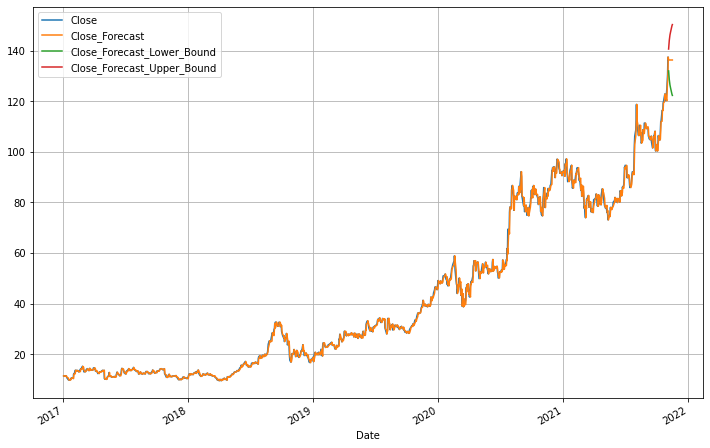

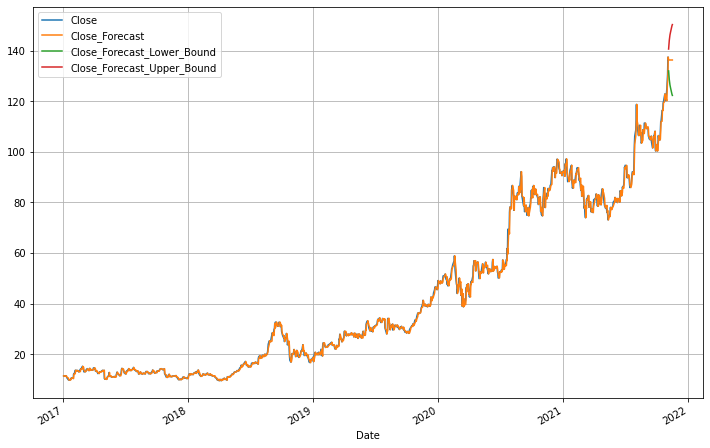

In [13]:
df_forecast_without_exog.plot.line('Date', ['Close' , 'Close_Forecast', 
                                             'Close_Forecast_Lower_Bound', 
                                             'Close_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
df_forecast_with_exog.plot.line('Date', ['Close' , 'Close_Forecast', 
                                             'Close_Forecast_Lower_Bound', 
                                             'Close_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))